# EDA & Cleaning OLX data

In [30]:
# Visualization setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure inline plotting (Jupyter)
%matplotlib inline

# Style
sns.set_theme(style="whitegrid")

df = pd.read_csv("../data/olx_products.csv")

print("Initial shape:", df.shape)

df.head()

Initial shape: (9900, 19)


,ad_id,title,price,Negotiable,location,date,product_url,main_image,image_links,brand,description,ad_type,in_warranty,deliverable,payment_type,condition,seller_name,seller_joined,seller_profile
0,200349080.0,طلب شراء,"EGP 2,000",0.0,"Agami, Alexandria•",2024-02-12 01:51:23.683415,https://www.dubizzle.com.eg/en/ad/%D8%B7%D9%84...,https://images.dubizzle.com.eg/thumbnails/8666...,['https://images.dubizzle.com.eg/thumbnails/86...,Samsung,Descriptionمطلوب تاب مدرسه للشراء بجميع مشتملاته,Wanted Item,NaN,0,NaN,NaN,شيماء,Member since Nov 2022,https://www.dubizzle.com.eg/en/profile/a1130d6...
1,200349076.0,الجهاز مغير شاشه,"EGP 4,000",0.0,"Imbaba, Giza•",2024-02-12 01:51:24.384839,https://www.dubizzle.com.eg/en/ad/%D8%A7%D9%84...,https://images.dubizzle.com.eg/thumbnails/8666...,['https://images.dubizzle.com.eg/thumbnails/86...,Xiaomi,DescriptionXiaomi redme not 10 &&&ram 6&&&spac...,For Sale,NaN,0,Cash or Installment,Used,AbdallaH,Member since Aug 2021,https://www.dubizzle.com.eg/en/profile/a9acf40...
2,200349069.0,iPhone xs 256,"EGP 12,200",1.0,"Sheikh Zayed, Giza•",2024-02-12 01:50:25.202598,https://www.dubizzle.com.eg/en/ad/iphone-xs-25...,https://images.dubizzle.com.eg/thumbnails/8666...,['https://images.dubizzle.com.eg/thumbnails/86...,Apple - iPhone,Descriptionالجهاز بحاله نضيفه &&&فاضي بدون مشت...,For Sale,NaN,0,Cash,Used,المعلن,Member since Jul 2017,https://www.dubizzle.com.eg/en/profile/0c97653...
3,200349064.0,Samsung a52s 5g like new. متاح بدل,"EGP 9,700",1.0,"Downtown Cairo, Cairo•",2024-02-12 01:49:26.455513,https://www.dubizzle.com.eg/en/ad/samsung-a52s...,https://images.dubizzle.com.eg/thumbnails/8666...,['https://images.dubizzle.com.eg/thumbnails/86...,Samsung,Descriptionسامسونج a52s 5g كسر زيرو باللون الم...,For Sale,NaN,0,NaN,NaN,أ/يوسف,Member since Nov 2022,https://www.dubizzle.com.eg/en/profile/e6b78df...
4,200349058.0,note 20 ultra 5G 12 ram,"EGP 21,000",0.0,"Awayed, Alexandria•",2024-02-12 01:48:27.765141,https://www.dubizzle.com.eg/en/ad/note-20-ultr...,https://images.dubizzle.com.eg/thumbnails/8666...,['https://images.dubizzle.com.eg/thumbnails/86...,Samsung,Descriptionنوت ٢٠ ألترا ٢٥٦ رام ١٢ &&&5gحاله ك...,For Sale,NaN,0,Cash,New,Mido,Member since Dec 2015,https://www.dubizzle.com.eg/en/profile/0676abd...


In [31]:
# Extract only relevant columns
relevant_columns = ['title', 'price', 'location', 'product_url', 'main_image', 'brand', 'description', 'ad_type', 'seller_name']
df = df[relevant_columns]

# Extract Price from 'EGP 2,000' to 2000
df['price'] = df['price'].str.replace('EGP ', '').str.replace(',', '').astype(float)
# Drop na values for price
df = df[df['price'].notna()]

# Remove '•' and double quotes from location
df['location'] = df['location'].str.replace('•', '').str.replace('"', '', regex=False).str.strip()

# Remove nan values from brand
df = df[df['brand'].notna()]

# Remove 'Description' prefix and replace consecutive '&' with a whitespace
df['description'] = df['description'].str.replace('Description', '').str.replace('&+', ' ', regex=True).str.strip()

# Remove 'ad_type' = 'Wanted Item'
df = df[df['ad_type'] != 'Wanted Item']
df = df.drop(columns=['ad_type'])

# reset index
df = df.reset_index(drop=True)

df.to_csv("../data/olx_products_cleaned.csv", index=False)

df.shape

(9263, 8)

## Brands Count

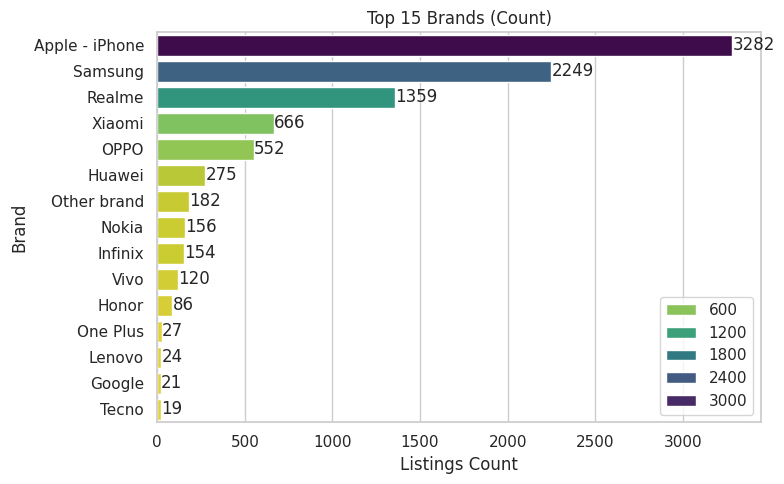

In [16]:
# Top brands by count
TOP_N = 15
brand_counts = df['brand'].value_counts().head(TOP_N)
plt.figure(figsize=(8,5))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis_r', hue=brand_counts.values)
plt.title(f'Top {TOP_N} Brands (Count)')
plt.xlabel('Listings Count')
plt.ylabel('Brand')
for i,v in enumerate(brand_counts.values):
    plt.text(v+1, i, str(v), va='center')
plt.tight_layout()
plt.show()

## Price distribution

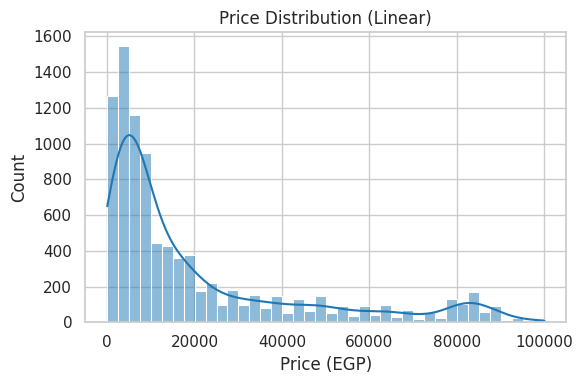

In [15]:
fig, ax = plt.subplots(figsize=(6,4))

# Linear
sns.histplot(df['price'], kde=True, ax=ax, bins=40, color="#1f77b4")
ax.set_title('Price Distribution (Linear)')
ax.set_xlabel('Price (EGP)')

plt.tight_layout()
plt.show()

## Price vs Brand

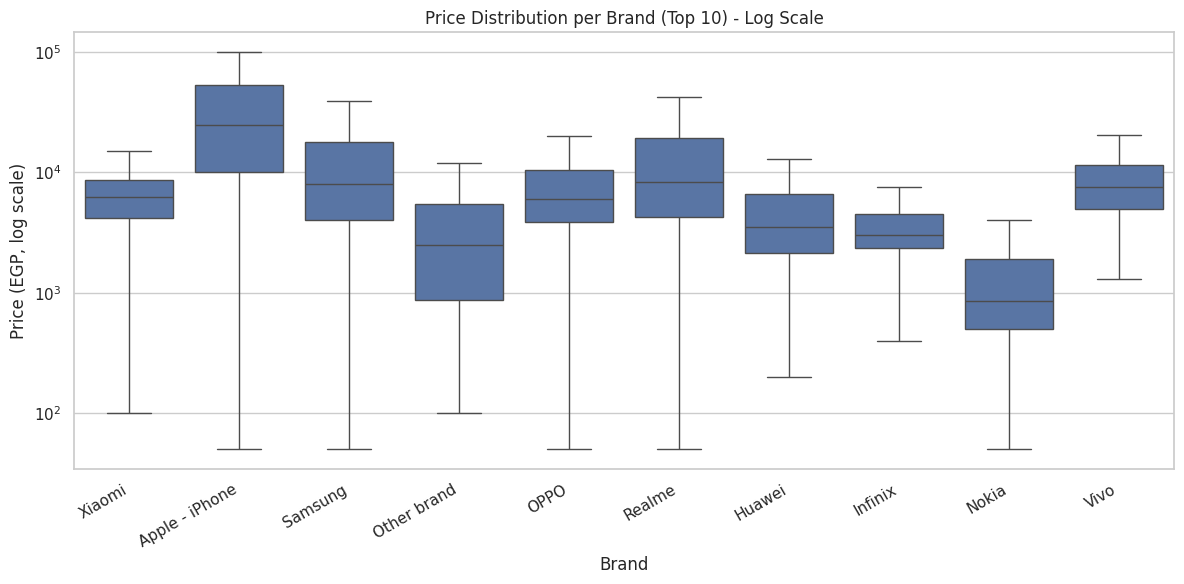

In [17]:
# Boxplot of price distribution per brand
TOP_N = 10
popular_brands = df['brand'].value_counts().head(TOP_N).index
subset = df[df['brand'].isin(popular_brands)]
plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x='brand', y='price', showfliers=False)
plt.yscale('log')
plt.title(f'Price Distribution per Brand (Top {TOP_N}) - Log Scale')
plt.xlabel('Brand')
plt.ylabel('Price (EGP, log scale)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()